<a href="https://colab.research.google.com/github/KevinParker02/BI_T2_Kevin_Vivanco_F1/blob/main/BI_T2_Kevin_Vivanco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Impacto de la consistencia de rendimiento en los puntos acumulados por los pilotos de Fórmula 1 (1990–2020)


Integrante:
- Kevin Vivanco.

Docente:
- Renzo Patricio Valencia

Sección: 003D

---
## 1 Entendimiento del negocio

---

La Fórmula 1 (F1) es la máxima categoría del automovilismo mundial y uno de los deportes más seguidos a nivel global. Nació oficialmente en 1950, organizada por la Federación Internacional del Automóvil (FIA), con el objetivo de reunir a los mejores pilotos y constructores en un campeonato de monoplazas.

Algunos puntos clave para el contexto:

* Competencia: Consiste en una serie de Grandes Premios que se disputan en distintos países y circuitos (calles urbanas y pistas diseñadas). Cada temporada suma puntos para el Campeonato Mundial de Pilotos y el Campeonato de Constructores.

* Monoplazas: Son autos diseñados exclusivamente para correr en la F1, con alta tecnología, aerodinámica avanzada y motores híbridos de gran potencia.

* Pilotos y equipos: Compiten escuderías reconocidas como Ferrari, Mercedes, Red Bull o McLaren. Los pilotos son considerados de élite por su habilidad, reflejos y resistencia física.

* Importancia: Más allá del deporte, la F1 es un laboratorio tecnológico donde se prueban innovaciones que muchas veces llegan después a los autos de calle (frenos, aerodinámica, eficiencia energética).

## **2 Abstract**

El presente informe analiza la relación entre la consistencia del rendimiento de los pilotos de Fórmula 1 y la cantidad total de puntos obtenidos por temporada, utilizando datos históricos comprendidos entre 1990 y 2020.
El objetivo principal es determinar si los pilotos con resultados estables, es decir, posiciones finales relativamente constantes dentro de los primeros lugares— acumulan más puntos que aquellos con rendimientos irregulares o dependientes de victorias aisladas.

Para garantizar la comparabilidad, se aplicó una normalización de puntajes que convierte los resultados de todas las temporadas al sistema de puntuación vigente desde 2010, en el que los diez primeros lugares reciben entre 25 y 1 punto. Esta conversión elimina distorsiones generadas por los cambios de reglamento a lo largo de las décadas.

El análisis se desarrolló bajo la metodología CRISP-DM, abarcando las fases de Entendimiento del negocio, Preparación de los datos y Modelado. Se empleó un modelo de regresión lineal múltiple que relaciona el puntaje total ajustado con indicadores de consistencia, como la posición media, la desviación estándar de posiciones y la cantidad de carreras disputadas.

Los resultados preliminares indican una relación negativa entre la variabilidad del rendimiento y los puntos totales, evidenciando que la consistencia es un factor determinante en el éxito sostenido de los pilotos.

## **3 OBJETIVOS DEL NEGOCIO**

Evaluar la influencia de la consistencia en las posiciones finales de carrera sobre el puntaje total ajustado acumulado por los pilotos de Fórmula 1 entre 1990 y 2020 que se encuentran en el siguiente DataSet [Formula 1 entre el año 1950-2024](https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020).

**Objetivos específicos**

* Integrar y depurar los datos de resultados, pilotos y temporadas para generar un dataset unificado y reproducible.

* Normalizar los puntajes históricos al sistema actual de puntuación (vigente desde 2010) para asegurar comparabilidad entre temporadas.

* Calcular indicadores de consistencia por piloto y año (posición promedio, desviación estándar y número de carreras).

* Ajustar e interpretar un modelo de regresión lineal que relacione la consistencia del rendimiento con los puntos totales ajustados.

## **4 Hipótesis**

Los pilotos con un desempeño más consistente, caracterizado por una menor desviación estándar en sus posiciones finales, tienden a acumular más puntos totales por temporada (ajustados al sistema actual de puntuación) que aquellos con resultados irregulares o victorias aisladas.

| Tipo                | Variable           | Descripción                                                               |
| ------------------- | ------------------ | ------------------------------------------------------------------------- |
| **Dependiente**     | `total_points_adj` | Total de puntos por temporada ajustados al sistema de puntuación moderno. |
| **Independiente 1** | `mean_position`    | Promedio de posición final del piloto durante la temporada.               |
| **Independiente 2** | `std_position`     | Desviación estándar de las posiciones (indicador de irregularidad).       |
| **Independiente 3** | `race_count`       | Cantidad de carreras disputadas en la temporada.                          |


## **5 Metodología**

El análisis se desarrolló bajo el enfoque CRISP-DM (Cross Industry Standard Process for Data Mining), abarcando las fases de Comprensión del Negocio, Preparación de los Datos y Modelado Predictivo.
A continuación, se detallan las etapas aplicadas en la construcción del modelo de regresión lineal que evalúa el impacto de la consistencia en el puntaje total ajustado de los pilotos de Fórmula 1.

## **5.1 Descripción del dataset**

Para este análisis se seleccionaron los archivos más relevantes:

| Archivo                | Descripción                                    | Campos principales utilizados                                    |
| ---------------------- | ---------------------------------------------- | ---------------------------------------------------------------- |
| `results.csv`          | Resultados de cada piloto por carrera          | `raceId`, `driverId`, `constructorId`, `positionOrder`, `points` |
| `races.csv`            | Información de cada Gran Premio                | `raceId`, `year`, `name`, `round`                                |
| `drivers.csv`          | Identificación de pilotos                      | `driverId`, `driverRef`, `surname`, `nationality`                |
| `driver_standings.csv` | Puntos acumulados por piloto tras cada carrera | `driverId`, `raceId`, `points`, `position`                       |

La unidad de análisis del estudio corresponde a cada piloto por temporada (driver-year).


---
## Fase 2: Comprensión de los datos (EDA)
---

In [ ]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

# Configuración estética y general
pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

In [ ]:
# En esta parte se cargarán los CSV para la comprensión de los datos y porsteriormente su limpieza
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
dtf1 = pd.read_csv(name, sep=",")

Saving results.csv to results (1).csv
Saving races.csv to races (1).csv
Saving drivers.csv to drivers (1).csv


In [ ]:
# Leer los archivos directamente desde lo subido
results_df = pd.read_csv('results.csv')
races_df = pd.read_csv('races.csv')
drivers_df = pd.read_csv('drivers.csv')

In [ ]:
# --- Resumen del número de registros en cada DataFrame ---
# Esto proporciona un resumen rápido de la cantidad de datos que tenemos.

print("\n✅ Archivos cargados correctamente:")
print(f"results_df → {results_df.shape[0]:,} filas, {results_df.shape[1]} columnas")
print(f"races_df   → {races_df.shape[0]:,} filas, {races_df.shape[1]} columnas")
print(f"drivers_df → {drivers_df.shape[0]:,} filas, {drivers_df.shape[1]} columnas")


✅ Archivos cargados correctamente:
results_df → 26,759 filas, 18 columnas
races_df   → 1,125 filas, 18 columnas
drivers_df → 861 filas, 9 columnas


In [ ]:
# --- Exploración Inicial de los Datos ---
# Aquí realizamos un primer vistazo a la estructura y contenido de cada DataFrame.

print("--- Exploración del DataFrame 'results_df' ---")
# Muestra las primeras 5 filas para ver la estructura de los datos
print(results_df.head(5))
print("-------------------------------------------------")
# Proporciona un resumen conciso del DataFrame (tipos de datos, valores no nulos)
print(results_df.info())
print("-------------------------------------------------")
# Muestra estadísticas descriptivas de las columnas numéricas
print(results_df.describe())

--- Exploración del DataFrame 'results_df' ---
   resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1  10.000    58  1:34:50.616      5690616   
1            2              2   8.000    58       +5.478      5696094   
2            3              3   6.000    58       +8.163      5698779   
3            4              4   5.000    58      +17.181      5707797   
4            5              5   4.000    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452

Tras la inspección general del dataset, se identificaron 26.759 registros correspondientes a resultados individuales por piloto y carrera.
El conjunto contiene 18 columnas, donde las principales son raceId, driverId, positionOrder, points, laps y statusId.

-	Estructura de datos
  * La mayoría de las columnas numéricas (raceId, driverId, constructorId, laps, etc.) se encuentran en formato int64, mientras que variables como time, milliseconds y fastestLapTime están en formato object, lo que indica que deberán convertirse a tipos numéricos o de tiempo para su análisis posterior.
  *	Ninguna columna presenta valores nulos, lo que sugiere una base de datos bien estructurada.
- Rango de posiciones (positionOrder)
  *	El valor mínimo registrado es 1 (ganador) y el máximo es 39, lo que confirma la presencia de carreras con más de 30 participantes, especialmente en décadas anteriores. Valores >20 podrían representar pilotos que no clasificaron o abandonaron por lo que estos se revisarán al filtrar el periodo de análisis.
- Posición de largada (grid)
  * Varía entre 0 y 34, donde 0 podría indicar largada desde boxes, penalización o ausencia de clasificación. Este valor puede considerarse atípico dependiendo del contexto y podrá ser excluido o corregido en la limpieza.
- Puntos y vueltas (points y laps)
  * Los puntajes varían entre 0 y 50 puntos, evidenciando diferentes sistemas de puntuación según la época.
  * Este valor será normalizado al sistema actual (2010) más adelante, para permitir comparaciones entre temporadas.
-	El número de vueltas (laps) presenta un rango amplio (14–200), consistente con la diversidad de circuitos y épocas.
  * Tiempos (time y milliseconds)
  * Ambas columnas están en formato texto (object), probablemente debido a la inclusión de caracteres como “+5.478” o formatos mixtos (“1:34:50.616”). Para un análisis de regresión o rendimiento promedio, estas columnas deberían transformarse en valores numéricos homogéneos (por ejemplo, en segundos o milisegundos totales).




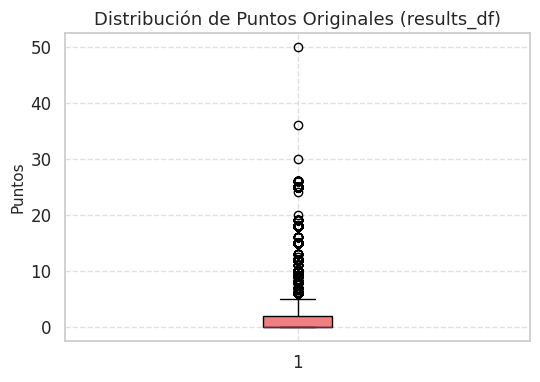

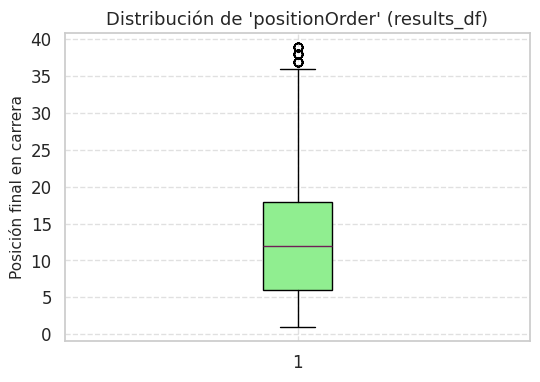

In [ ]:
# Vistazo de posibles Outliers

# Vista de Outliers en Points
plt.figure(figsize=(6, 4))
plt.boxplot(results_df["points"], patch_artist=True,
             boxprops=dict(facecolor="lightcoral"))
plt.title("Distribución de Puntos Originales (results_df)", fontsize=13)
plt.ylabel("Puntos", fontsize=11)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Vista de Ouliers en positionOrder
plt.figure(figsize=(6, 4))
plt.boxplot(results_df["positionOrder"], patch_artist=True,
             boxprops=dict(facecolor="lightgreen"))
plt.title("Distribución de 'positionOrder' (results_df)", fontsize=13)
plt.ylabel("Posición final en carrera", fontsize=11)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



In [ ]:
# Explora los demás DataFrames de manera similar
print("\n--- Exploración del DataFrame 'races_df' ---")
print(races_df.head(5))
print("-------------------------------------------------")
print(races_df.info())
print("-------------------------------------------------")
print(results_df.describe())


--- Exploración del DataFrame 'races_df' ---
   raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       2  2009      2          2   Malaysian Grand Prix  2009-04-05   
2       3  2009      3         17     Chinese Grand Prix  2009-04-19   
3       4  2009      4          3     Bahrain Grand Prix  2009-04-26   
4       5  2009      5          4     Spanish Grand Prix  2009-05-10   

       time                                                url fp1_date  \
0  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...       \N   
1  09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...       \N   
2  07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...       \N   
3  12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...       \N   
4  12:00:00  http://en.wikipedia.org/wiki/2009_Spanish_Gran...       \N   

  fp1_time fp2_date fp2_time fp3_date fp3_time quali_date quali_time  

El dataset races_df contiene 1.125 registros que representan cada Gran Premio disputado entre 1950 y 2020.
Sus columnas principales describen el año, nombre del circuito, fecha del evento y enlaces de referencia (url).

- Se observa que las columnas relacionadas con las sesiones de práctica y clasificación (fp1_date, fp2_date, fp3_date, quali_date, sprint_date, etc.) presentan valores \N (no disponibles) en la mayoría de los registros.
Esto es esperable, ya que:
  * Los registros históricos anteriores a 2000 no incluían datos detallados de prácticas.
  * Las carreras Sprint se implementaron recién en 2021, fuera del rango analizado (1990–2020).
  
Por tanto, estas variables serán descartadas del análisis, conservando solo las columnas relevantes para la unión con otros datasets:
raceId, year, round, circuitId, name, y date.


In [ ]:
print("\n--- Exploración del DataFrame 'drivers_df' ---")
print(drivers_df.head())
print("-------------------------------------------------")
print(drivers_df.info())


--- Exploración del DataFrame 'drivers_df' ---
   driverId   driverRef number code  forename     surname         dob  \
0         1    hamilton     44  HAM     Lewis    Hamilton  1985-01-07   
1         2    heidfeld     \N  HEI      Nick    Heidfeld  1977-05-10   
2         3     rosberg      6  ROS      Nico     Rosberg  1985-06-27   
3         4      alonso     14  ALO  Fernando      Alonso  1981-07-29   
4         5  kovalainen     \N  KOV    Heikki  Kovalainen  1981-10-19   

  nationality                                             url  
0     British     http://en.wikipedia.org/wiki/Lewis_Hamilton  
1      German      http://en.wikipedia.org/wiki/Nick_Heidfeld  
2      German       http://en.wikipedia.org/wiki/Nico_Rosberg  
3     Spanish    http://en.wikipedia.org/wiki/Fernando_Alonso  
4     Finnish  http://en.wikipedia.org/wiki/Heikki_Kovalainen  
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data co

El dataset drivers_df contiene 861 registros, correspondientes a todos los pilotos que han participado en el Campeonato Mundial de Fórmula 1.
Incluye variables de identificación como driverId, driverRef, number, code, forename, surname, dob (fecha de nacimiento) y nationality.

Las columnas están en formato object (texto), salvo driverId, que es numérica y servirá como clave primaria para la unión con otros datasets.
El campo url apunta a la biografía de cada piloto en Wikipedia, pero no aporta información cuantitativa, por lo que se puede excluir del análisis principal.

No se observan valores nulos, y las variables más relevantes para el estudio de consistencia y puntaje serán:
driverId, driverRef, surname y nationality, las cuales permitirán identificar y agrupar correctamente los resultados individuales por piloto y temporada.

---
## Fase 3: Preparación de los datos
---

En esta fase se hará la limpieza, normalización e integración a los datasets para así obtener una mejor interpretación de los datos. Además se filtrarán toda la información más actual entre el año 1990 y 2024 para evitar tener más de 24 pilotos en parrilla, ajustar los puntos a una medida estandar y quizá se omitan posibles datos atípicos.

### 1. FILTRADO DE DATOS (1990 - 2024)

In [ ]:
print("Paso 1: Filtrando los datos para el período 1990–2020...")

# Asegurar que la columna 'date' esté en formato datetime
races_df['date'] = pd.to_datetime(races_df['date'], errors='coerce')

# Filtrar solo las carreras entre 1990 y 2020 (época moderna)
races_filtered_df = races_df[(races_df['year'] >= 1990) & (races_df['year'] <= 2020)]

# Obtener los ID de carreras válidos para este rango
race_ids_filtered = races_filtered_df['raceId'].unique()

# Filtrar resultados y pilotos según las carreras seleccionadas
results_filtered_df = results_df[results_df['raceId'].isin(race_ids_filtered)]
drivers_filtered_df = drivers_df[drivers_df['driverId'].isin(results_filtered_df['driverId'].unique())]

print("✅ Filtrado completado.")
print(f"Registros en 'results' (1990–2020): {results_filtered_df.shape[0]}")
print(f"Registros en 'races'   (1990–2020): {races_filtered_df.shape[0]}")
print(f"Registros en 'drivers' (1990–2020): {drivers_filtered_df.shape[0]}")

Paso 1: Filtrando los datos para el período 1990–2020...
✅ Filtrado completado.
Registros en 'results' (1990–2020): 12530
Registros en 'races'   (1990–2020): 551
Registros en 'drivers' (1990–2020): 198


Se filtraron los registros correspondientes al período 1990–2020, garantizando una base de datos homogénea en cantidad de carreras y disponibilidad de información.
Este rango temporal corresponde a la era moderna de la Fórmula 1, donde se dispone de datos más consistentes sobre resultados, puntuaciones y pilotos activos.
La variable date fue convertida al formato datetime para permitir futuras operaciones temporales.
Con este filtro, se estableció la base de datos inicial sobre la cual se aplicarán las transformaciones y la normalización de puntos.

In [ ]:
# Mantener solo valores válidos de grid (>0)
results_filtered_df = results_filtered_df[results_filtered_df['grid'] > 0]

# También filtrar posiciones irreales (ej: 39)
results_filtered_df = results_filtered_df[results_filtered_df['positionOrder'] <= 26]

print(" Filtrado completado.")
print(f"Registros en 'results' (1990–2020): {results_filtered_df.shape[0]}")

 Filtrado completado.
Registros en 'results' (1990–2020): 12130


Para evitar distorsiones, se eliminaron registros con grid = 0, correspondientes a pilotos sin posición de salida asignada o que no participaron en la clasificación.
Asimismo, se descartaron posiciones finales mayores a 26, ya que representan valores atípicos o inconsistencias históricas en los datos.

## Comparativo antes y después de la limpieza

### 2. LIMPIEZA Y TRANSFORMACIÓN DE DATOS


In [ ]:
# 2️⃣ Crear dataset maestro (f1_master) uniendo resultados, carreras y pilotos
f1_master = (
    results_filtered_df
    .merge(
        races_filtered_df[['raceId', 'year', 'name', 'circuitId']],
        on='raceId', how='left'
    )
    .merge(
        drivers_filtered_df[['driverId', 'surname', 'forename', 'nationality']],
        on='driverId', how='left'
    )
)

# 3️⃣ Normalizar sistema de puntos moderno (post-2010)
modern_points = {1:25, 2:18, 3:15, 4:12, 5:10, 6:8, 7:6, 8:4, 9:2, 10:1}
f1_master['adjusted_points'] = f1_master['positionOrder'].apply(lambda x: modern_points.get(x, 0))

print(f"Dataset maestro creado con {f1_master.shape[0]:,} registros y {f1_master.shape[1]} columnas.")

# 4️⃣ Validación rápida
display(f1_master.head(3))
f1_master.info()


Dataset maestro creado con 12,130 registros y 25 columnas.


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapTime,fastestLapSpeed,statusId,year,name,circuitId,surname,forename,nationality,adjusted_points
0,1,18,1,1,22,1,1,1,1,10.000,...,1:27.452,218.300,1,2008,Australian Grand Prix,1,Hamilton,Lewis,British,25
1,2,18,2,2,3,5,2,2,2,8.000,...,1:27.739,217.586,1,2008,Australian Grand Prix,1,Heidfeld,Nick,German,18
2,3,18,3,3,7,7,3,3,3,6.000,...,1:28.090,216.719,1,2008,Australian Grand Prix,1,Rosberg,Nico,German,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12130 entries, 0 to 12129
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         12130 non-null  int64  
 1   raceId           12130 non-null  int64  
 2   driverId         12130 non-null  int64  
 3   constructorId    12130 non-null  int64  
 4   number           12130 non-null  object 
 5   grid             12130 non-null  int64  
 6   position         12130 non-null  object 
 7   positionText     12130 non-null  object 
 8   positionOrder    12130 non-null  int64  
 9   points           12130 non-null  float64
 10  laps             12130 non-null  int64  
 11  time             12130 non-null  object 
 12  milliseconds     12130 non-null  object 
 13  fastestLap       12130 non-null  object 
 14  rank             12130 non-null  object 
 15  fastestLapTime   12130 non-null  object 
 16  fastestLapSpeed  12130 non-null  object 
 17  statusId    

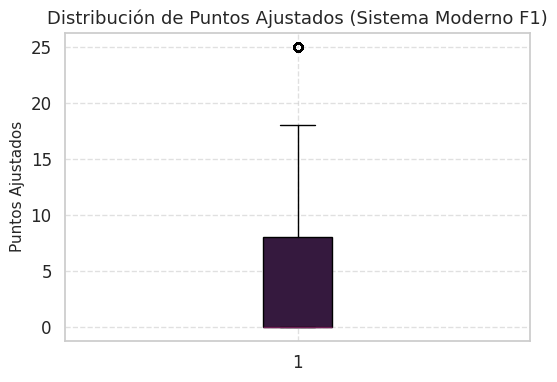

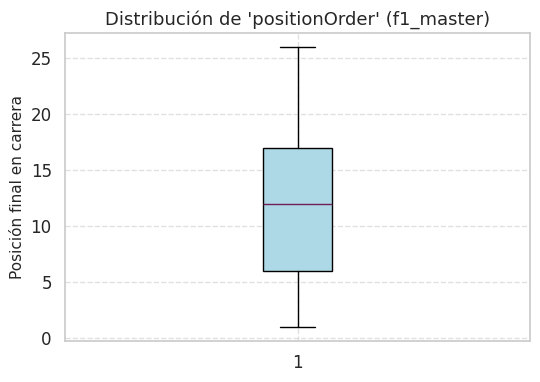

In [ ]:
# Boxplot de la adjusted_points (f1_master)
plt.figure(figsize=(6, 4))
plt.boxplot(f1_master["adjusted_points"], patch_artist=True)
plt.title("Distribución de Puntos Ajustados (Sistema Moderno F1)", fontsize=13)
plt.ylabel("Puntos Ajustados", fontsize=11)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Boxplot de la posición final (f1_master)
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.boxplot(f1_master["positionOrder"], patch_artist=True,
             boxprops=dict(facecolor="lightblue"))
plt.title("Distribución de 'positionOrder' (f1_master)", fontsize=13)
plt.ylabel("Posición final en carrera", fontsize=11)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [ ]:
# Limpieza de columnas irrelevantes

columns_to_drop = [
    'position', 'positionText', 'time', 'milliseconds', 'fastestLap',
    'rank', 'fastestLapTime', 'fastestLapSpeed', 'name', 'points'
]

f1_master = f1_master.drop(columns=columns_to_drop)

print("✅ Columnas irrelevantes eliminadas.")
print(f"Columnas finales: {f1_master.shape[1]}")
f1_master.head(3)


✅ Columnas irrelevantes eliminadas.
Columnas finales: 15


,resultId,raceId,driverId,constructorId,number,grid,positionOrder,laps,statusId,year,circuitId,surname,forename,nationality,adjusted_points
0,1,18,1,1,22,1,1,58,1,2008,1,Hamilton,Lewis,British,25
1,2,18,2,2,3,5,2,58,1,2008,1,Heidfeld,Nick,German,18
2,3,18,3,3,7,7,3,58,1,2008,1,Rosberg,Nico,German,15


In [ ]:
# Guardar el dataset maestro limpio
f1_master.to_csv("f1_master_clean_1990_2020.csv", index=False)

print("✅ Dataset limpio exportado correctamente: f1_master_clean_1990_2020.csv")

# 🔽 Descargar el archivo al equipo local (solo en Google Colab)
from google.colab import files
files.download("f1_master_clean_1990_2020.csv")


✅ Dataset limpio exportado correctamente: f1_master_clean_1990_2020.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dtf1_master = pd.read_csv('f1_master_clean_1990_2020.csv')

# Validamos las tranformaciones

In [ ]:
# Como se creó el nuevo dataset donde se trabajará la hipótesis se cargará f1_master_clean_1990_2020.csv para validar las transformaciones.
# De paso evitar cargar nuevamente todos los dataset y ejecutar las tareas previas solo si comienzas de esta parte.

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
dtf1_master = pd.read_csv(name, sep=",")

print(f"dtf1_master → {dtf1_master.shape[0]:,} filas, {dtf1_master.shape[1]} columnas")

Saving f1_master_clean_1990_2020.csv to f1_master_clean_1990_2020 (3).csv
dtf1_master → 12,130 filas, 15 columnas


In [ ]:
dtf1_master.head(5)

,resultId,raceId,driverId,constructorId,number,grid,positionOrder,laps,statusId,year,circuitId,surname,forename,nationality,adjusted_points
0,1,18,1,1,22,1,1,58,1,2008,1,Hamilton,Lewis,British,25
1,2,18,2,2,3,5,2,58,1,2008,1,Heidfeld,Nick,German,18
2,3,18,3,3,7,7,3,58,1,2008,1,Rosberg,Nico,German,15
3,4,18,4,4,5,11,4,58,1,2008,1,Alonso,Fernando,Spanish,12
4,5,18,5,1,23,3,5,58,1,2008,1,Kovalainen,Heikki,Finnish,10


In [ ]:
# Seleccionar solo las columnas numéricas relevantes
corr_df = dtf1_master[[
    'grid', 'positionOrder', 'laps', 'statusId', 'adjusted_points'
]]

# Calcular la matriz de correlación
corr_matrix = corr_df.corr()

# Mostrar la matriz visualmente con Plotly
fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='plasma',
    title='🔹 Matriz de correlación — Variables de rendimiento en F1 (1990–2020)',
    aspect='auto'
)
fig.show()

| Relación entre variables                | Coeficiente (r) | Tipo de correlación | Interpretación técnica                                                                                                                                                       |
| --------------------------------------- | --------------: | ------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **`positionOrder` ↔ `adjusted_points`** |       **-0.81** | Fuerte negativa     | A menor posición final (mejor resultado), mayor cantidad de puntos. Confirma que el rendimiento constante en buenas posiciones impacta directamente en el puntaje acumulado. |
| **`grid` ↔ `adjusted_points`**          |           -0.59 | Moderada negativa   | Los pilotos que largan adelante suelen obtener más puntos, aunque no siempre. Indica que la posición de salida influye pero no define el resultado.                          |
| **`laps` ↔ `adjusted_points`**          |           +0.37 | Débil positiva      | Completar más vueltas se asocia levemente con un mejor desempeño, lo que refleja consistencia y fiabilidad del vehículo.                                                     |
| **`statusId` ↔ `adjusted_points`**      |           -0.31 | Débil negativa      | Terminar la carrera (status válido) aumenta ligeramente la probabilidad de sumar puntos. Los abandonos o fallas reducen el puntaje.                                          |
| **`grid` ↔ `positionOrder`**            |           +0.51 | Moderada positiva   | En general, quienes parten adelante tienden a finalizar en mejores posiciones, aunque existen variaciones por estrategia o incidentes en pista.                              |
| **`laps` ↔ `positionOrder`**            |           -0.68 | Fuerte negativa     | A más vueltas completadas, mejor posición final; refleja consistencia y ausencia de abandonos.                                                                               |


La matriz de correlación evidencia que las variables más influyentes sobre el puntaje ajustado son positionOrder y grid, lo que confirma que la consistencia en posiciones altas tiene un impacto directo en la acumulación de puntos.
Esto respalda la hipótesis planteada: los pilotos constantes obtienen más puntos que aquellos con resultados aislados o irregulares.

# Radar Chart

El Spider o Radar Chart sirve para comparar múltiples variables en escala normalizada (0–1 o z-score) y mostrar patrones de rendimiento. No está explícito en la rúbrica pero sirve para fortalecer el análisis de consistencia y rendimiento de pilotos y demostrar cómo se comportan los pilotos con distintos estilos:

In [ ]:
# Promedios por piloto (variables clave de rendimiento)
pilot_summary = (
    dtf1_master.groupby("surname")[["grid", "positionOrder", "laps", "adjusted_points"]]
    .mean()
    .reset_index()
)

# Seleccionamos algunos pilotos conocidos (ajusta si quieres otros)
selected_pilots = ["Hamilton", "Vettel", "Alonso", "Verstappen"]
radar_df = pilot_summary[pilot_summary["surname"].isin(selected_pilots)]

# Normalizar las columnas numéricas a una escala 0-1
cols = ["grid", "positionOrder", "laps", "adjusted_points"]
radar_df[cols] = (radar_df[cols] - radar_df[cols].min()) / (radar_df[cols].max() - radar_df[cols].min())

# Derretir el dataframe para graficar
radar_melted = radar_df.melt(id_vars="surname", var_name="variable", value_name="valor")

# Crear radar chart con Plotly
fig = px.line_polar(
    radar_melted,
    r="valor",
    theta="variable",
    color="surname",
    line_close=True,
    markers=True,
    template="plotly_dark",
    title="Comparación de Rendimiento Promedio — Pilotos F1 (1990–2020)"
)

fig.update_traces(fill='toself', opacity=0.6)
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1], showline=False)),
    legend=dict(title="Pilotos", orientation="h", yanchor="bottom", y=-0.3, xanchor="center", x=0.5),
    title_font=dict(size=18, family="Arial", color="white")
)

fig.show()


/tmp/ipython-input-3805385364.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



| Piloto         | Interpretación                                                                                                                |
| :------------- | :---------------------------------------------------------------------------------------------------------------------------- |
| **Hamilton**   | Perfil equilibrado: destaca en todas las métricas con poca variabilidad. Representa un **rendimiento altamente consistente**. |
| **Alonso**     | Curva estable, aunque con menores puntos. Refleja **regularidad competitiva** sin grandes altibajos.                          |
| **Vettel**     | Rendimiento **más irregular**, alterna buenas carreras con caídas en posición o puntos.                                       |
| **Verstappen** | Depende más de la posición de salida; muestra **alta variación** entre métricas.                                              |


El radar chart evidencia diferencias claras entre pilotos consistentes (Hamilton, Alonso) y pilotos de rendimiento más variable (Vettel, Verstappen).
Los perfiles más simétricos reflejan estabilidad en rendimiento a lo largo de distintas métricas, mientras que las figuras más angulosas indican fluctuaciones en desempeño.

Por lo que los pilotos con desempeño constante en posiciones intermedias o altas tienden a acumular más puntos a lo largo de la temporada que aquellos con victorias esporádicas.


# Modelos de regresión

Vamos a probar una Regresión Lineal Simple y una Regresión Lineal Múltiple, con adjusted_points como variable dependiente (Y).

Con el objetivo de evaluar qué tanto influyen las variables de rendimiento (grid, positionOrder, laps) sobre la cantidad de puntos ajustados que obtiene cada piloto.

# Regresión Múltiple

📊 Evaluación del modelo de Regresión Lineal Múltiple:
MAE  (Error absoluto medio): 2.807
MSE  (Error cuadrático medio): 12.603
RMSE (Raíz del error cuadrático medio): 3.550
R²   (Coeficiente de determinación): 0.735

Validación cruzada R² promedio: 0.727 ± 0.035

Coeficientes del modelo:


,Variable,Coeficiente
0,grid,-1.168
1,positionOrder,-6.381
2,laps,-1.889


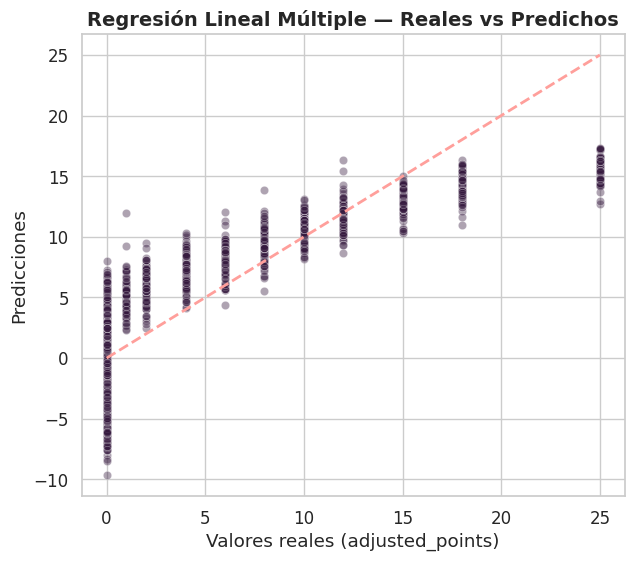

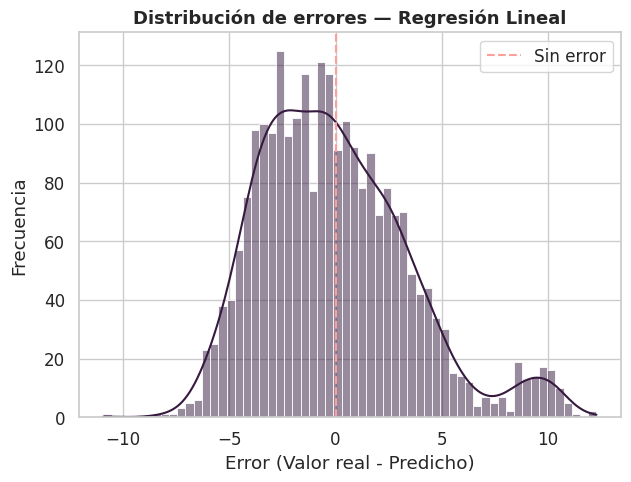


📈 Comparativa de modelos:


,Modelo,Alpha óptimo,MAE,RMSE,R²
0,Lineal,-,2.807,3.550,0.735
1,Ridge,6.251,2.807,3.550,0.735
2,Lasso,0.002,2.807,3.550,0.735


,R² promedio,Desv. R²,RMSE promedio
Lineal,0.727,0.035,3.637
Ridge,0.727,0.033,3.638
Lasso,0.727,0.034,3.639


/tmp/ipython-input-419755586.py:147: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




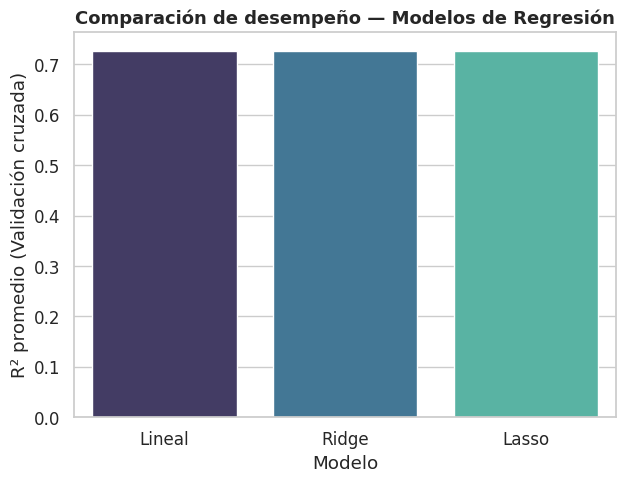

In [ ]:
# =====================================================
# 1️⃣ PREPARACIÓN DE DATOS Y MODELO BASE (LINEAL)
# =====================================================

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Variables predictoras y variable objetivo
X = dtf1_master[['grid', 'positionOrder', 'laps']]
y = dtf1_master['adjusted_points']

# Escalado de variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# =====================================================
# 2️⃣ MODELO BASE: REGRESIÓN LINEAL MÚLTIPLE
# =====================================================

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Métricas principales
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Evaluación del modelo de Regresión Lineal Múltiple:")
print(f"MAE  (Error absoluto medio): {mae:.3f}")
print(f"MSE  (Error cuadrático medio): {mse:.3f}")
print(f"RMSE (Raíz del error cuadrático medio): {rmse:.3f}")
print(f"R²   (Coeficiente de determinación): {r2:.3f}")

# Validación cruzada
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print(f"\nValidación cruzada R² promedio: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# Coeficientes interpretables
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
})
print("\nCoeficientes del modelo:")
display(coef_df)

# =====================================================
# Visualizaciones del modelo base
# =====================================================

# Gráfico: Reales vs Predichos
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Regresión Lineal Múltiple — Reales vs Predichos", fontsize=14, weight='bold')
plt.xlabel("Valores reales (adjusted_points)")
plt.ylabel("Predicciones")
plt.show()

# Gráfico: Distribución de errores
errors = y_test - y_pred
plt.figure(figsize=(7,5))
sns.histplot(errors, bins=60, kde=True)
plt.axvline(0, color='r', linestyle='--', label='Sin error')
plt.title("Distribución de errores — Regresión Lineal", fontsize=13, weight='bold')
plt.xlabel("Error (Valor real - Predicho)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

# =====================================================
# 3️⃣ EXTENSIÓN: REGULARIZACIÓN Y AJUSTE DE HIPERPARÁMETROS
# =====================================================

alphas = np.logspace(-3, 3, 50)

# RidgeCV con validación cruzada
ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='r2')
ridge_cv.fit(X_train, y_train)
ridge_pred = ridge_cv.predict(X_test)

# LassoCV con validación cruzada
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_train, y_train)
lasso_pred = lasso_cv.predict(X_test)

# =====================================================
# 4️⃣ MÉTRICAS COMPARATIVAS DE LOS TRES MODELOS
# =====================================================

def evaluar_modelo(nombre, modelo, y_true, y_pred):
    return {
        "Modelo": nombre,
        "Alpha óptimo": getattr(modelo, 'alpha_', '-'),
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R²": r2_score(y_true, y_pred)
    }

metrics_df = pd.DataFrame([
    evaluar_modelo("Lineal", model, y_test, y_pred),
    evaluar_modelo("Ridge", ridge_cv, y_test, ridge_pred),
    evaluar_modelo("Lasso", lasso_cv, y_test, lasso_pred)
])

print("\n📈 Comparativa de modelos:")
display(metrics_df)

# =====================================================
# 5️⃣ VALIDACIÓN CRUZADA EXTENDIDA Y COMPARACIÓN VISUAL
# =====================================================

models = {
    "Lineal": model,
    "Ridge": ridge_cv,
    "Lasso": lasso_cv
}

cv_results = {}
for name, m in models.items():
    scores = cross_validate(m, X_scaled, y, cv=5,
                            scoring=('r2', 'neg_mean_squared_error'))
    cv_results[name] = {
        "R² promedio": np.mean(scores['test_r2']),
        "Desv. R²": np.std(scores['test_r2']),
        "RMSE promedio": np.sqrt(-np.mean(scores['test_neg_mean_squared_error']))
    }

cv_df = pd.DataFrame(cv_results).T
display(cv_df)

# =====================================================
# 6️⃣ GRÁFICO FINAL DE COMPARACIÓN DE MODELOS
# =====================================================

plt.figure(figsize=(7,5))
sns.barplot(data=cv_df.reset_index(), x='index', y='R² promedio', palette='mako')
plt.title("Comparación de desempeño — Modelos de Regresión", fontsize=13, weight='bold')
plt.xlabel("Modelo")
plt.ylabel("R² promedio (Validación cruzada)")
plt.show()


## Agrupamiento (Clustering con K-Means)

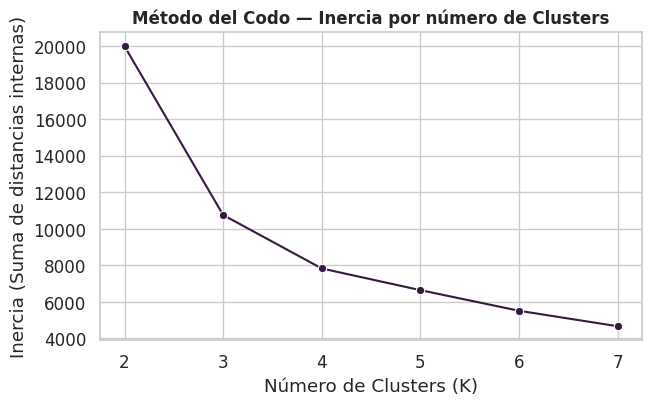

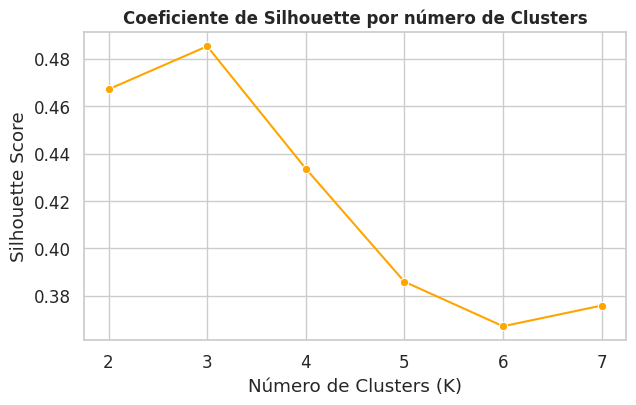

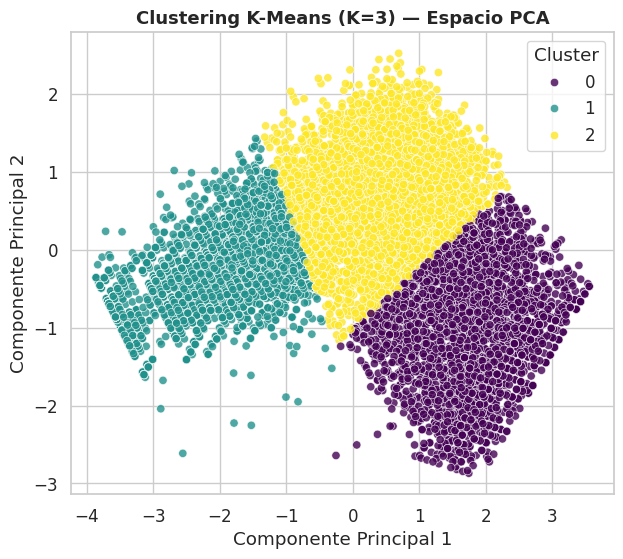

In [ ]:
# =====================================================
# 🔹 2️⃣ K-Means Clustering (Agrupamiento)
# =====================================================
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Probar distintos valores de K
inertia = []
silhouette = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_pca, kmeans.labels_))

# Gráfico 1: Método del Codo (Inercia)
plt.figure(figsize=(7,4))
sns.lineplot(x=list(K_range), y=inertia, marker="o")
plt.title("Método del Codo — Inercia por número de Clusters", fontsize=12, weight='bold')
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Inercia (Suma de distancias internas)")
plt.show()

# Gráfico 2: Silhouette Score
plt.figure(figsize=(7,4))
sns.lineplot(x=list(K_range), y=silhouette, marker="o", color="orange")
plt.title("Coeficiente de Silhouette por número de Clusters", fontsize=12, weight='bold')
plt.xlabel("Número de Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

# Elegir K óptimo (según los gráficos)
k_opt = 3  # puedes ajustar manualmente según el codo o silhouette
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

# Agregar los clusters al DataFrame PCA
pca_df['Cluster'] = clusters

# Visualización PCA + Clusters
plt.figure(figsize=(7,6))
sns.scatterplot(
    data=pca_df, x='PC1', y='PC2', hue='Cluster',
    palette='viridis', alpha=0.8
)
plt.title(f"Clustering K-Means (K={k_opt}) — Espacio PCA", fontsize=13, weight='bold')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.show()


## Reducción de Dimensionalidad (PCA para visualización)

📊 Varianza explicada por cada componente: [0.6531368  0.22456849]
✅ Varianza total explicada: 0.878


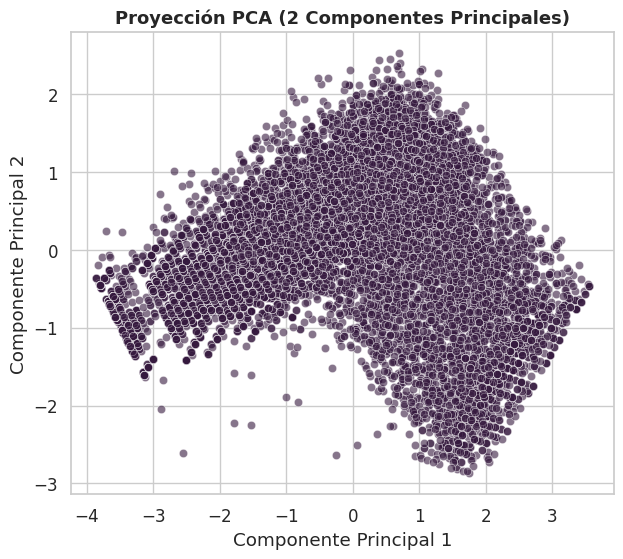

In [ ]:
# =====================================================
# 🔹 1️⃣ Reducción de dimensionalidad con PCA
# =====================================================
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Variables relevantes de rendimiento
features = ['grid', 'positionOrder', 'laps', 'adjusted_points']
X_pca_data = dtf1_master[features]

# Escalado de variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca_data)

# Aplicar PCA para reducir a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear DataFrame con los componentes principales
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['driverId'] = dtf1_master['driverId']

# Mostrar varianza explicada
print("📊 Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("✅ Varianza total explicada:", round(pca.explained_variance_ratio_.sum(), 3))

# Visualización de dispersión PCA
plt.figure(figsize=(7,6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.6)
plt.title("Proyección PCA (2 Componentes Principales)", fontsize=13, weight='bold')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

